<a href="https://colab.research.google.com/github/jayalakshmir03/Jarvis-Desktop-Voice-Assistant/blob/main/water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install --upgrade seaborn

In [ ]:
import sys
!{sys.executable} -m pip install streamlit

In [ ]:
import streamlit as st

st.title('My First Streamlit App')
st.write('Hello, Streamlit! This is a simple example.')

# You can add more Streamlit components here
# For example, a slider:
value = st.slider('Select a value', 0, 100, 50)
st.write('Selected value:', value)

In [ ]:
# To run your Streamlit app, you would typically save the above code to a .py file (e.g., app.py)
# and then run it from your terminal using: streamlit run app.py
# In a Colab environment, running Streamlit requires some additional setup for tunneling.
# One common way is to use ngrok or a similar service to expose the local server.

# Example using ngrok (you'll need to install ngrok and get an authtoken):
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip
# !./ngrok authtoken YOUR_AUTHTOKEN

# After installing ngrok and setting up the authtoken, you can run:
# !streamlit run your_app_file.py &>/dev/null& # Run Streamlit in the background
# !./ngrok http 8501 # Streamlit usually runs on port 8501

st.write("""
To run your Streamlit app in Colab, save the app code into a Python file (e.g., `app.py`).
Then, you'll need to use a tunneling service like ngrok to expose your local Streamlit server.

Here's a conceptual outline of how you would do it (requires ngrok setup):
1. Save your Streamlit code to `app.py`:
   `%%writefile app.py`
   `import streamlit as st`
   `st.title('My App')`
   `st.write('Content')`

2. Install ngrok (if not already done) and provide your authtoken.

3. Run your Streamlit app in the background and start ngrok:
   `!streamlit run app.py &>/dev/null&`
   `!./ngrok http 8501`

This will provide a public URL where you can access your Streamlit app.
""")

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/water_potability.csv"  # Change if in a subfolder
water_data = pd.read_csv(file_path)

# Check the first few rows
water_data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
 water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
water_data.shape

(3276, 10)

In [ ]:
water_data.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [ ]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
 water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
water_data.duplicated().any()

np.False_

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/My Drive/Colab Notebooks/water_potability.csv"  # Update with correct path
water_data = pd.read_csv(file_path)

# Check for missing values in each column
missing_values = water_data.isnull().sum()
print(missing_values)


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
null_df = water_data.isnull().sum().reset_index()

null_df.columns = ['column', 'Null_count']

null_df['%miss_value'] = round(null_df['Null_count']/len(water_data), 2)*100

null_df

,column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


<Axes: ylabel='Frequency'>

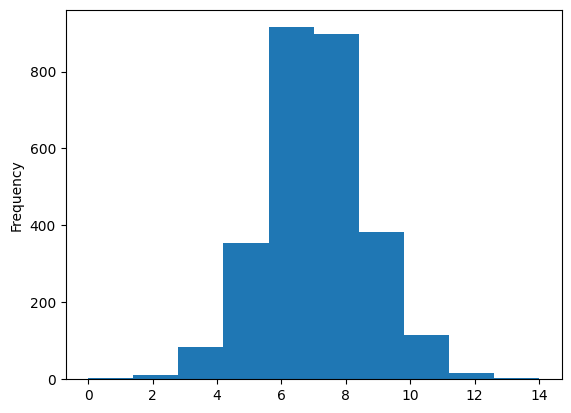

In [ ]:
water_data['ph'].plot(kind = 'hist')

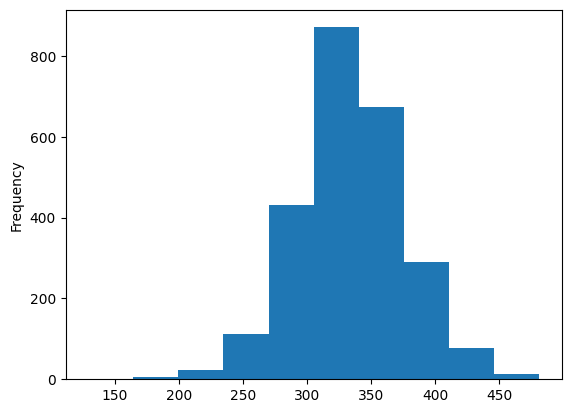

In [ ]:
 water_data['Sulfate'].plot(kind = 'hist')

plt.show()

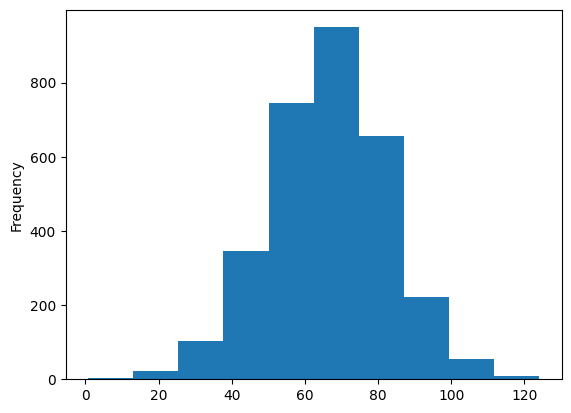

In [ ]:
water_data['Trihalomethanes'].plot(kind = 'hist')

plt.show()

In [ ]:
#sns.histplot(data = water_data['Trihalomethanes'], kde = True, hue = water_data['Potability

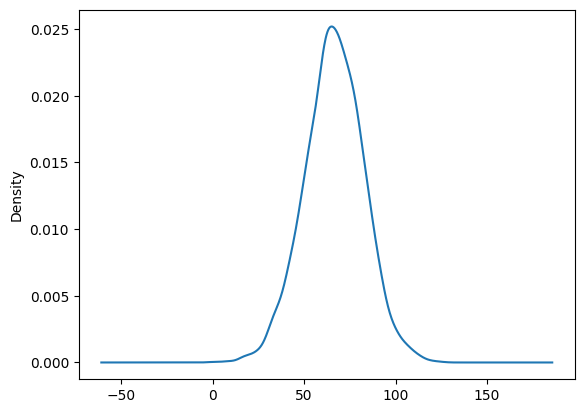

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)

water_data['Trihalomethanes'].plot(kind='kde', ax=ax)

plt.show()

In [ ]:
water_data['ph'] = water_data['ph'].fillna(water_data['ph'].mean())
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].mean())
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data['Sulfate'].mean())

In [ ]:
(water_data.isnull().sum())

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


checking correlation

---



---



In [ ]:
corr_matrix = water_data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


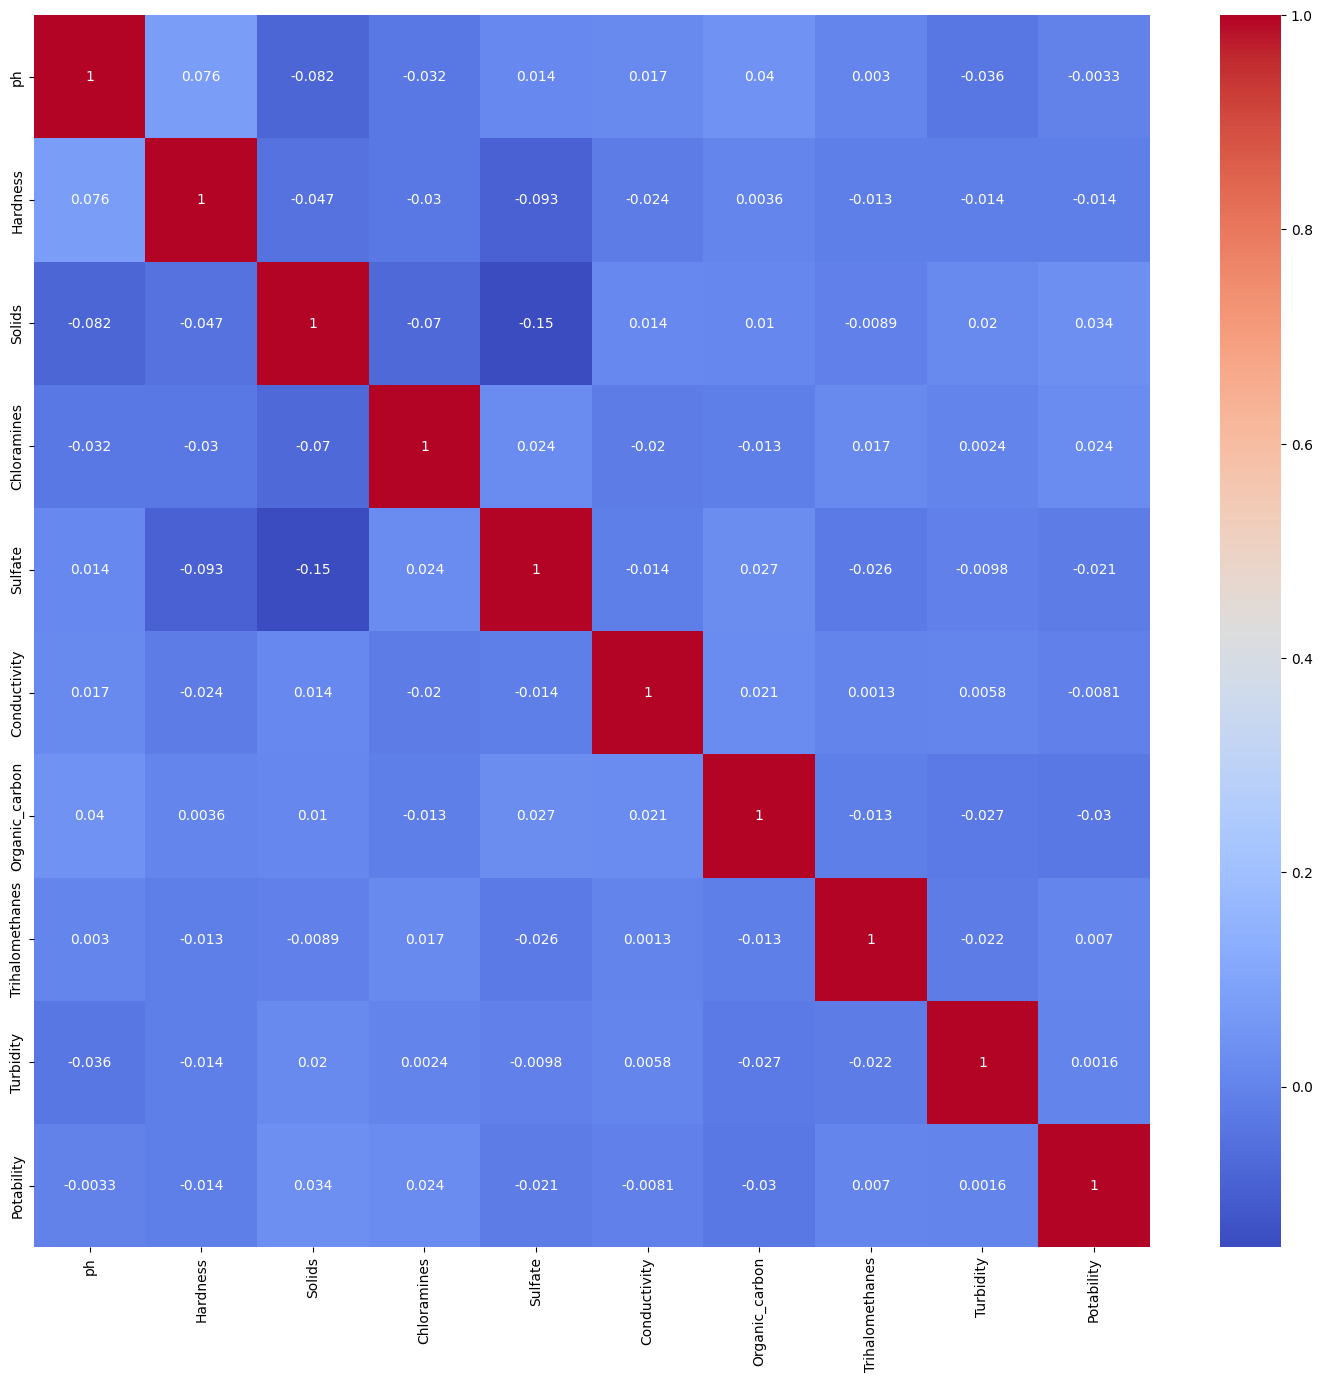

In [ ]:
plt.figure(figsize=(18, 16))

sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm')

plt.show()

In [ ]:
corr_matrix1 = corr_matrix.abs()

upper_tri = corr_matrix1.where (np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool_))

upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.075833,0.081884,0.031811,0.014403,0.017192,0.040061,0.002994,0.036222,0.003287
Hardness,NaN,NaN,0.046899,0.030054,0.092766,0.023915,0.003610,0.012690,0.014449,0.013837
Solids,NaN,NaN,NaN,0.070148,0.149840,0.013831,0.010242,0.008875,0.019546,0.033743
Chloramines,NaN,NaN,NaN,NaN,0.023791,0.020486,0.012653,0.016627,0.002363,0.023779
Sulfate,NaN,NaN,NaN,NaN,NaN,0.014059,0.026909,0.025605,0.009790,0.020619
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.020966,0.001255,0.005798,0.008128
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012976,0.027308,0.030001
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021502,0.006960
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001581
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

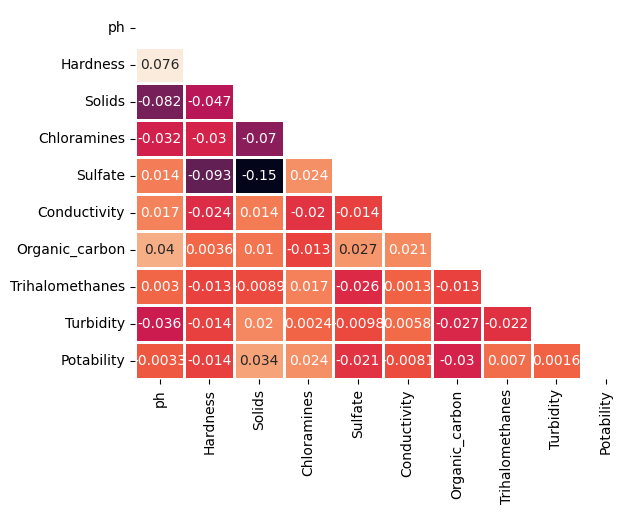

In [ ]:
matrix = np.triu(corr_matrix)
sns.heatmap(water_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket", cbar=False)

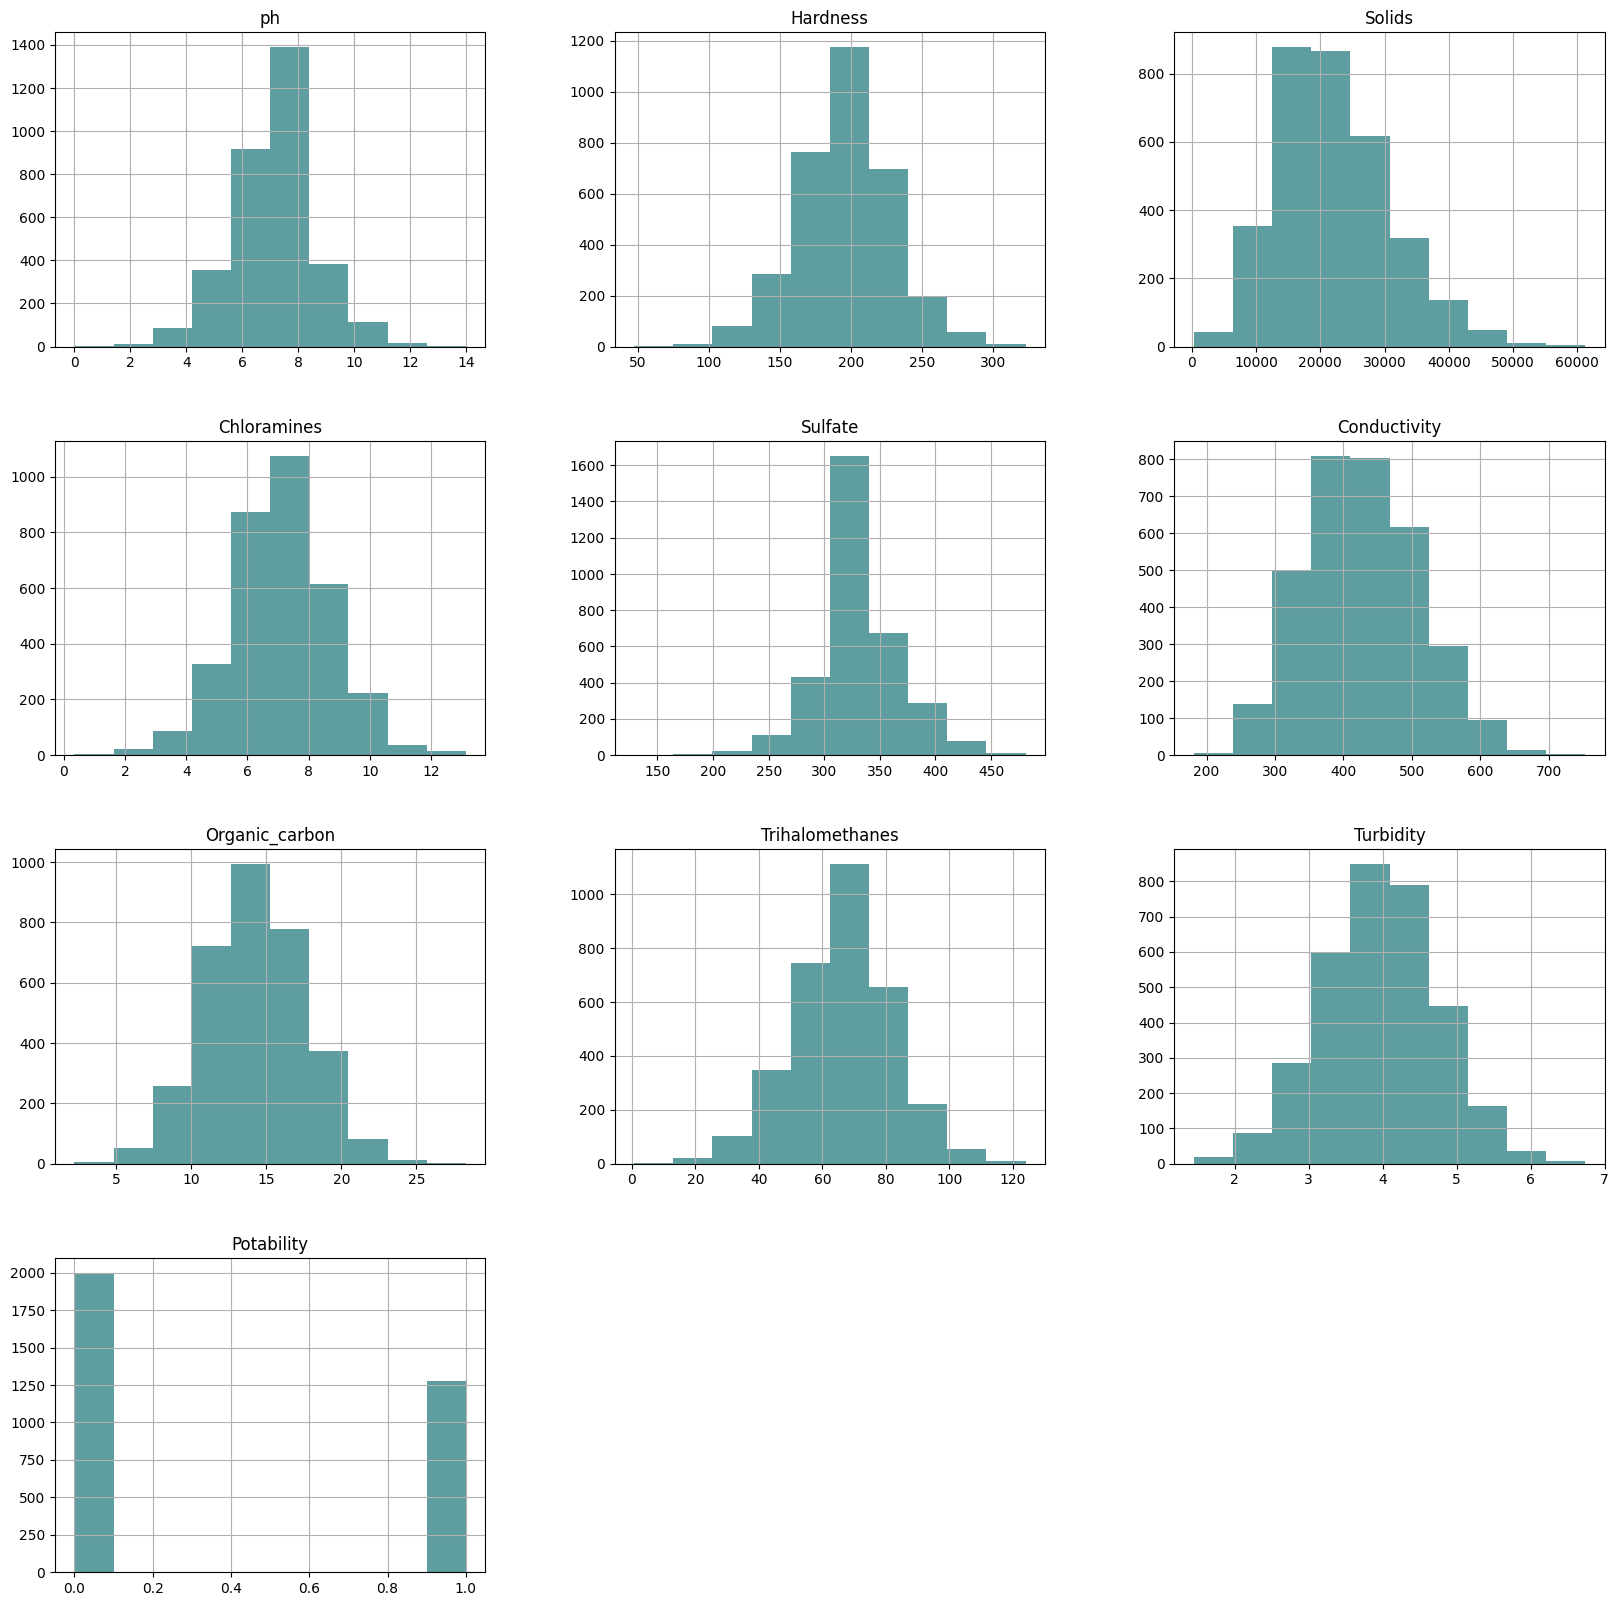

In [ ]:
data_hist_plot = water_data.hist(figsize = (20,20), color = "#5F9EA0")


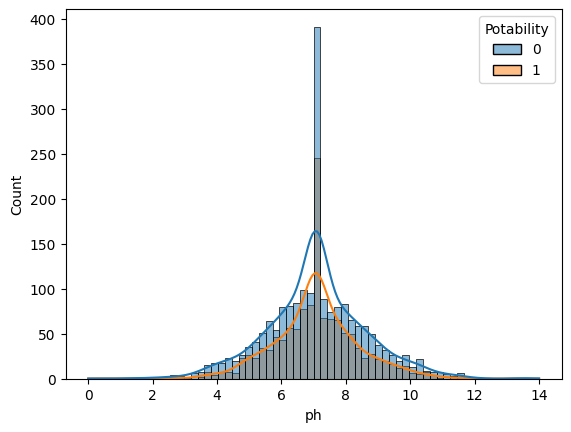

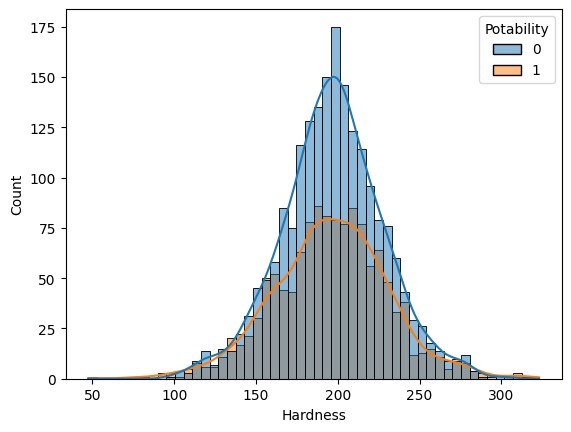

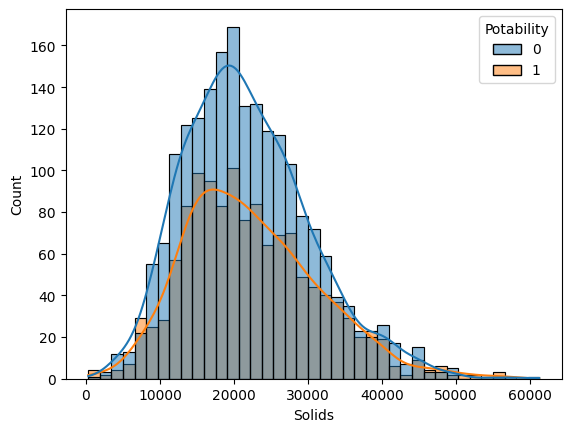

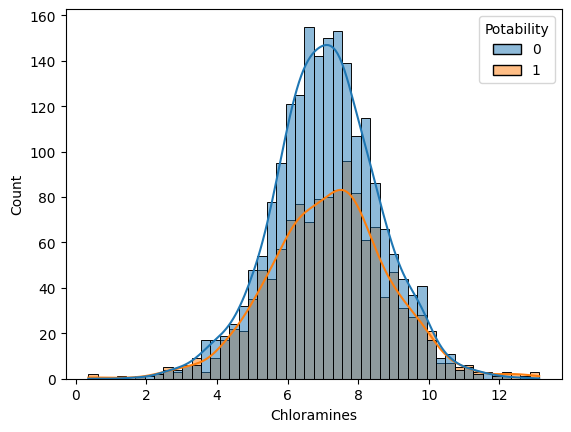

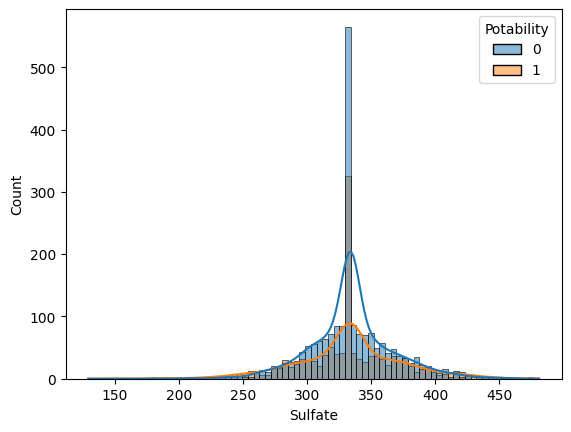

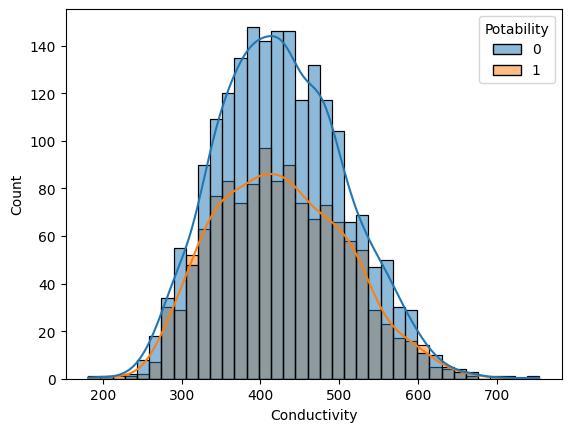

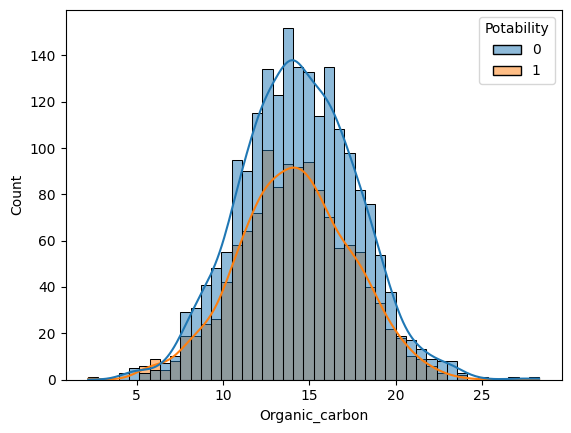

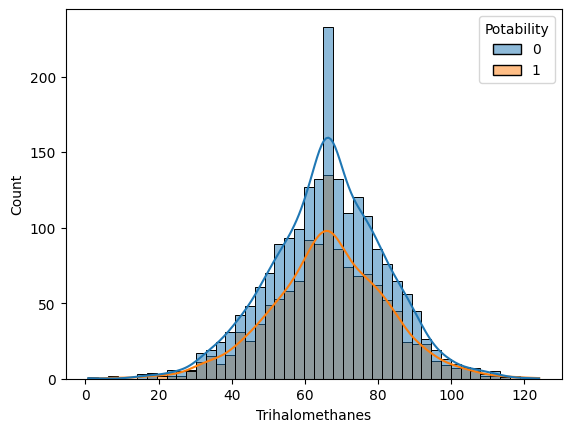

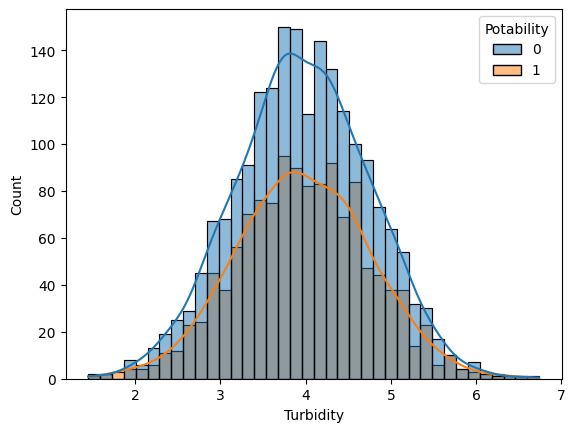

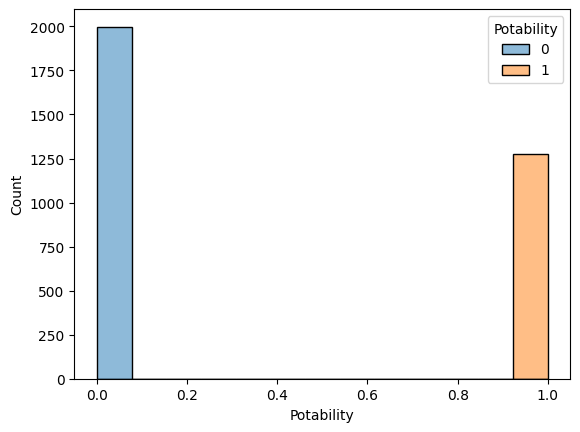

In [ ]:
for col in water_data.columns:
    sns.histplot(data=water_data, x=col, kde=True, hue= 'Potability')

    plt.show()

In [ ]:
water_data.groupby('Potability').mean().T

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


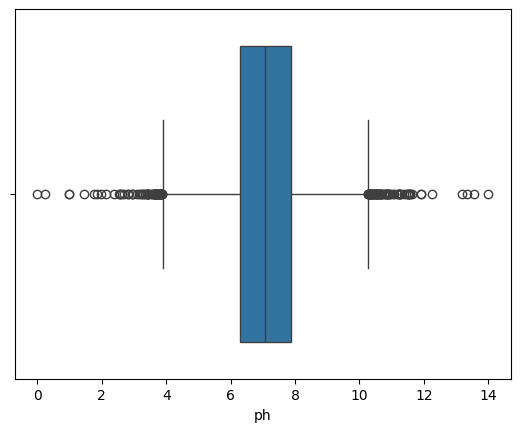

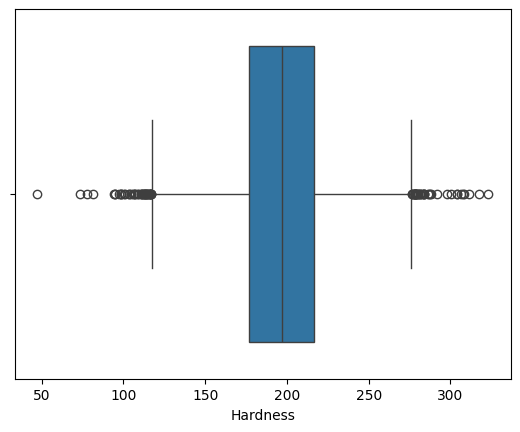

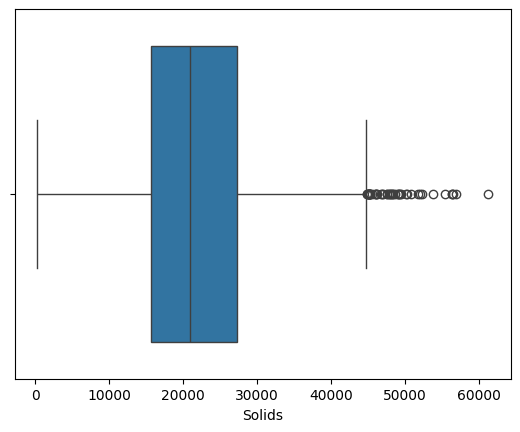

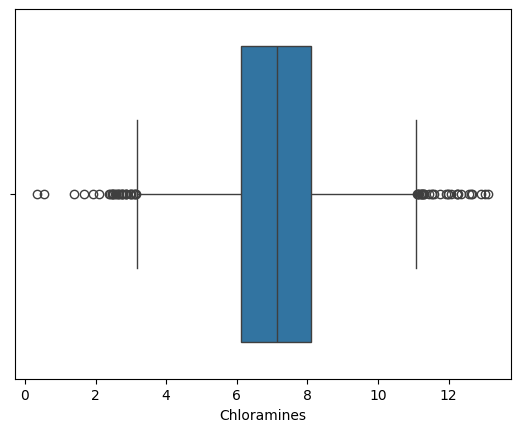

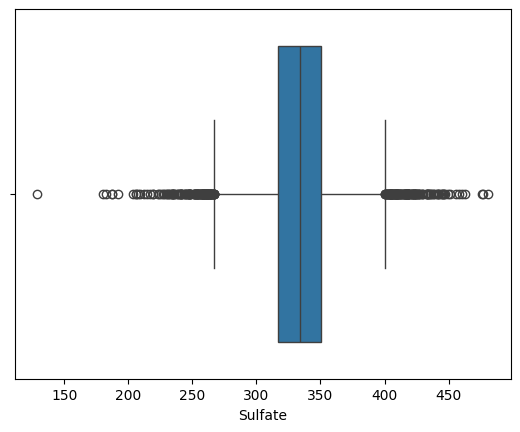

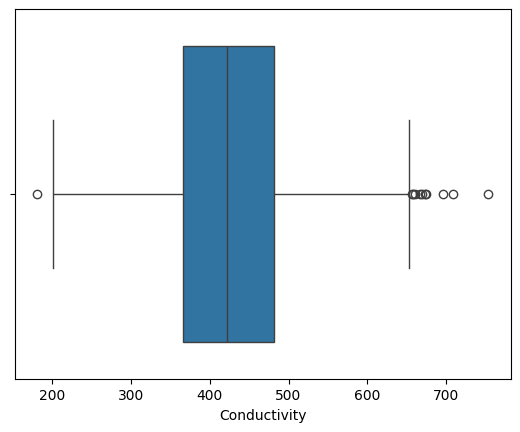

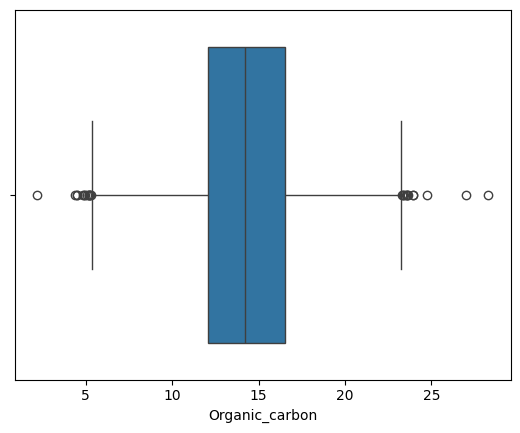

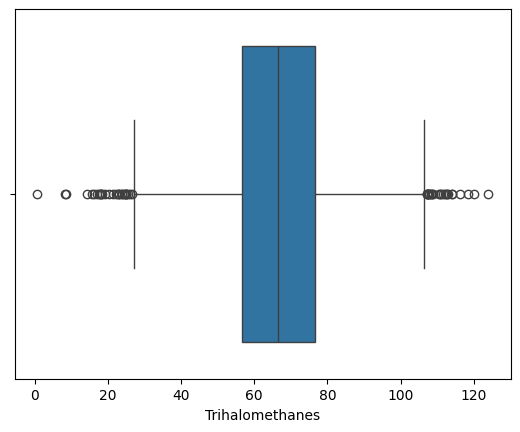

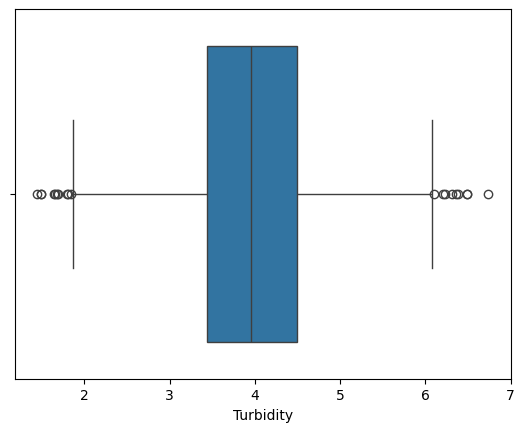

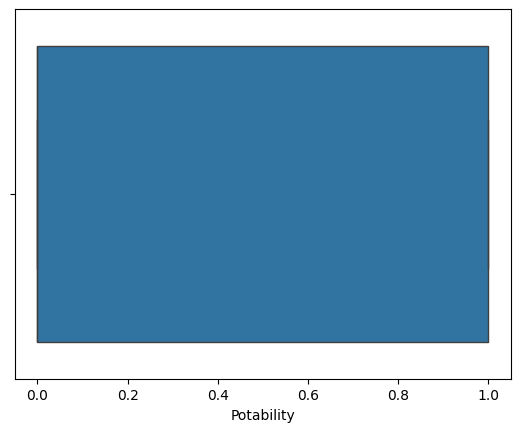

In [ ]:
for col in water_data.columns:
     sns.boxplot(data=water_data, x=col)

     plt.show()


<Axes: ylabel='count'>

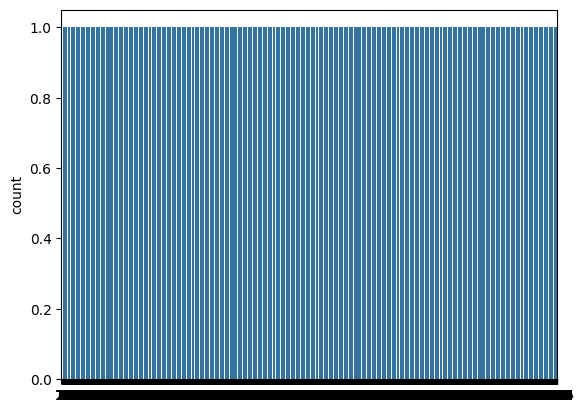

In [ ]:
sns.countplot(water_data['Potability'])

In [ ]:
x = water_data.drop('Potability', axis = 1)
y = water_data['Potability']


In [ ]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()

In [ ]:
X_scaled = std_scaler.fit_transform(x)

X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42, stratify=y)

In [ ]:
 x_train.shape, x_test.shape

((2620, 9), (656, 9))

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
LR=LogisticRegression()

DT=DecisionTreeClassifier()

RF = RandomForestClassifier()

ETC=ExtraTreesClassifier()

SVM=SVC()

KNN=KNeighborsClassifier()

GBC=GradientBoostingClassifier()

ABC=AdaBoostClassifier()

NB=GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.impute import SimpleImputer
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
]

# Check and handle missing values in features
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
X_scaled = imputer.fit_transform(X_scaled)

# Initialize variables
features = X_scaled
labels = y
CV = 5
accu_list = []  # Accuracy List
ModelName = []  # Model Name List

# Loop through models and calculate cross-validation accuracy
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)

# Creating a DataFrame to store results
model_acc_df = pd.DataFrame({"Model": ModelName, "Cross_val_Accuracy": accu_list})

# Print the result
print(model_acc_df)

                        Model  Cross_val_Accuracy
0          LogisticRegression           61.019549
1      DecisionTreeClassifier           57.876420
2      RandomForestClassifier           63.004841
3        ExtraTreesClassifier           62.943074
4                         SVC           65.080339
5        KNeighborsClassifier           59.340579
6  GradientBoostingClassifier           62.088717
7          AdaBoostClassifier           61.019177
8                  GaussianNB           61.263871


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# Handle missing values by replacing NaNs with the column mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation on training and test data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Instantiate models
SVM = SVC()
ETC = ExtraTreesClassifier()
RF = RandomForestClassifier()

# Train models
SVM.fit(x_train, y_train)
ETC.fit(x_train, y_train)
RF.fit(x_train, y_train)

# Make predictions
y_pred_rf = RF.predict(x_test)
y_pred_svm = SVM.predict(x_test)
y_pred_etc = ETC.predict(x_test)


In [ ]:
 print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       400
           1       0.66      0.34      0.45       256

    accuracy                           0.68       656
   macro avg       0.67      0.62      0.61       656
weighted avg       0.67      0.68      0.65       656



In [ ]:
 print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



In [ ]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       400
           1       0.70      0.29      0.41       256

    accuracy                           0.68       656
   macro avg       0.69      0.61      0.59       656
weighted avg       0.68      0.68      0.63       656



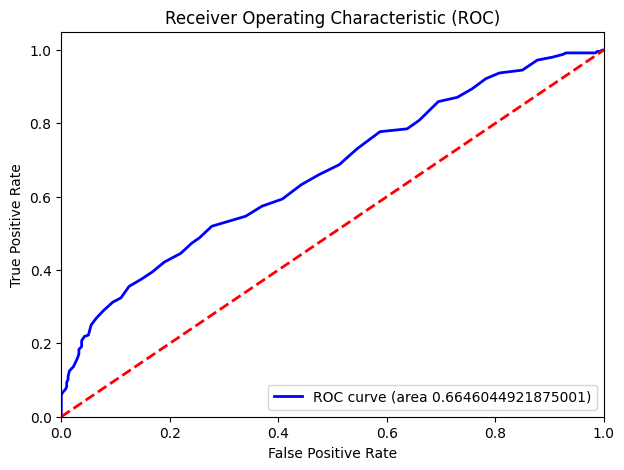

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores=ETC.predict_proba(x_test) [:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)



plt.figure(figsize=(7, 5))

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area {roc_auc})')

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle ='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC)')

plt.legend(loc="lower right")


plt.show()

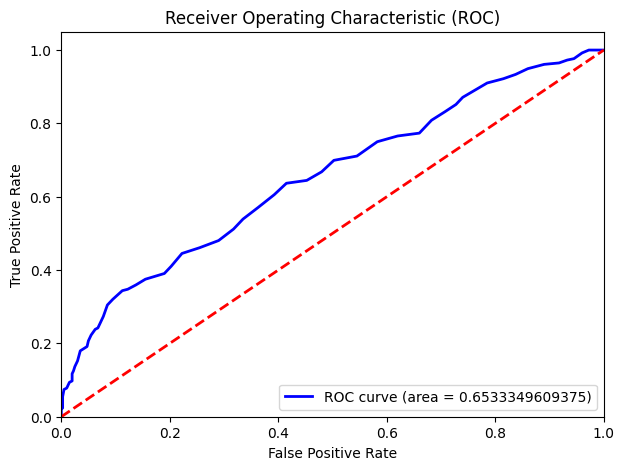

In [ ]:
from sklearn.metrics import roc_curve, auc
y_scores = RF.predict_proba(x_test) [:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold



params_RF = {"min_samples_split": [2, 6],

             "min_samples_leaf": [1, 4],

             "n_estimators" : [100, 200, 300],

             "criterion": ["gini", 'entropy']
              }

cv_method = StratifiedKFold(n_splits=3)
GridSearchCV_RF = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid=params_RF,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

GridSearchCV_RF.fit(x_train, y_train)
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are =", best_params_RF)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are = {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}


In [ ]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator

RandomForestClassifier(min_samples_split=6, n_estimators=300)

In [ ]:
best_estimator = GridSearchCV_RF.best_estimator_

best_estimator.fit(x_train, y_train)

y_pred_best = best_estimator.predict(x_test)

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.68      0.90      0.78       400
           1       0.69      0.34      0.45       256

    accuracy                           0.68       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.68      0.65       656



In [ ]:
from sklearn.metrics import accuracy_score

print(f"Accuracy of Random Forest Model = {round(accuracy_score(y_test, y_pred_best)*100,2)} %")

Accuracy of Random Forest Model = 68.14 %


In [ ]:
 water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
list1 = water_data.iloc[2:3, 0:9].values.flatten().tolist()

list1

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108135,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [ ]:
ph=float(input('Enter the Ph Value='))

Hardness=float(input('Enter the Hardness Value = '))

Solids = float(input('Enter the Solids Value = '))

Chloramines = float(input('Enter the Chloramines Value='))

Sulfate = float(input('Enter the Sulfate Value = '))

Conductivity = float(input('Enter the Conductivity Value = '))

Organic_carbon = float(input('Enter the organic_carbon value =' ))

Trihalomethanes = float(input('Enter the Trihalomethanes Value = '))

Turbidity = float(input('Enter the Turbidity Value = '))

Enter the Ph Value=2
Enter the Hardness Value = 3
Enter the Solids Value = 4
Enter the Chloramines Value=5
Enter the Sulfate Value = 3
Enter the Conductivity Value = 4
Enter the organic_carbon value =5
Enter the Trihalomethanes Value = 6
Enter the Turbidity Value = 7


In [ ]:
input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
std_scaler = StandardScaler()

# Fit the scaler to your dataset (Make sure df contains only numerical features)
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/water_potability.csv")  # Load your dataset
X = df.drop(columns=["Potability"], errors="ignore")  # Drop target column if exists

# Fit the StandardScaler to the dataset
std_scaler.fit(X)


StandardScaler()

In [ ]:
water_data_input = std_scaler.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity ,Organic_carbon, Trihalomethanes, Turbidity]])


In [ ]:
model_prediction = best_estimator.predict(water_data_input)
print(model_prediction)


[1]


In [ ]:
if model_prediction [0] == 0:
    print("Water is Not SAFE for Consumption")
else:
    print("Water is SAFE for Consumption")

Water is SAFE for Consumption


normalization

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from google.colab import files

In [ ]:
# Load the already uploaded CSV (Replace 'your_file.csv' with your actual filename)
file_path = "/content/drive/My Drive/Colab Notebooks/water_potability.csv"
df = pd.read_csv(file_path)

In [ ]:
# Handle missing values by replacing them with the column mean
df_imputed = df.fillna(df.mean())

In [ ]:
# Select numerical columns (excluding categorical columns like 'Potability')
numerical_cols = df_imputed.drop(columns=['Potability'])

In [ ]:
# Apply Z-score normalization (StandardScaler)
scaler_zscore = StandardScaler()
df_zscore = pd.DataFrame(scaler_zscore.fit_transform(numerical_cols), columns=numerical_cols.columns)


In [ ]:
# Apply Min-Max scaling (default 0-1 range)
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(numerical_cols), columns=numerical_cols.columns)


In [ ]:
# Apply Max-Absolute scaling
scaler_maxabs = MaxAbsScaler()
df_maxabs = pd.DataFrame(scaler_maxabs.fit_transform(numerical_cols), columns=numerical_cols.columns)

In [ ]:
# Apply Min-Max scaling with range (-1,1)
scaler_minmax_range = MinMaxScaler(feature_range=(-1, 1))
df_minmax_range = pd.DataFrame(scaler_minmax_range.fit_transform(numerical_cols), columns=numerical_cols.columns)


In [ ]:
# Save the normalized datasets as CSV files
df_zscore.to_csv("zscore_normalized.csv", index=False)
df_minmax.to_csv("minmax_normalized.csv", index=False)
df_minmax_range.to_csv("minmax_range_normalized.csv", index=False)
df_maxabs.to_csv("maxabs_normalized.csv", index=False)

In [ ]:
# Provide download links for each file
for file in ["zscore_normalized.csv", "minmax_normalized.csv", "minmax_range_normalized.csv", "maxabs_normalized.csv"]:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x500 with 0 Axes>

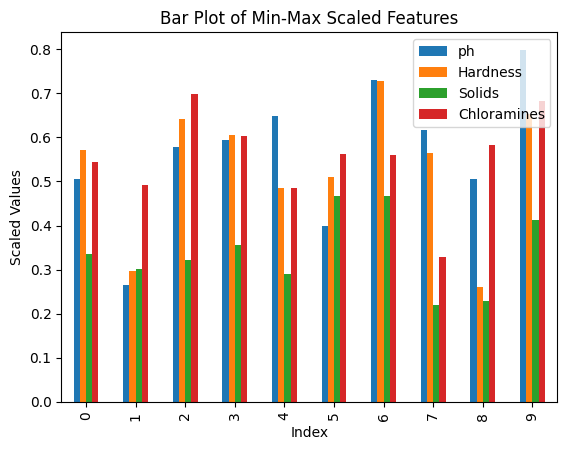

<Figure size 1000x500 with 0 Axes>

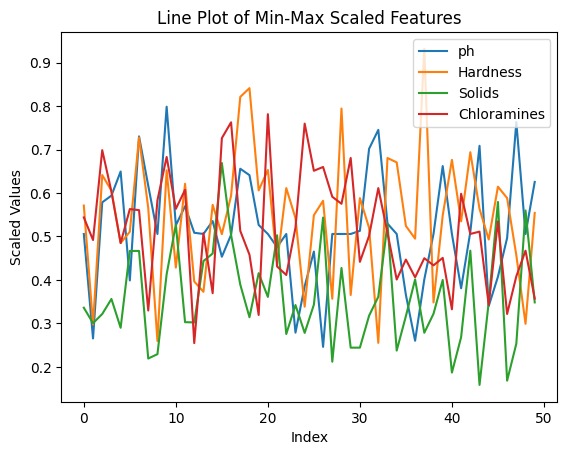

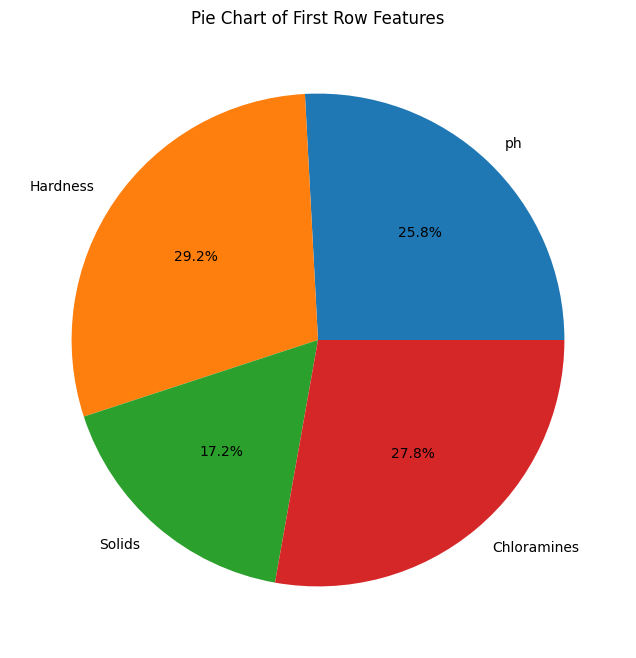

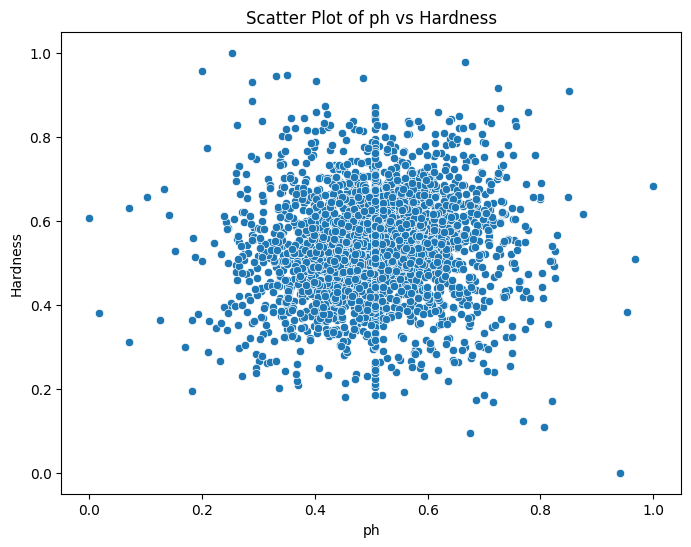

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for better visualization
selected_cols = df_minmax.columns[:4]  # Choose first 4 numerical columns for plotting

# Bar Plot
plt.figure(figsize=(10, 5))
df_minmax[selected_cols].head(10).plot(kind="bar")
plt.title("Bar Plot of Min-Max Scaled Features")
plt.xlabel("Index")
plt.ylabel("Scaled Values")
plt.legend(loc="upper right")
plt.show()

# Line Plot
plt.figure(figsize=(10, 5))
df_minmax[selected_cols].head(50).plot(kind="line")
plt.title("Line Plot of Min-Max Scaled Features")
plt.xlabel("Index")
plt.ylabel("Scaled Values")
plt.legend(loc="upper right")
plt.show()

# Pie Chart (for the first row)
plt.figure(figsize=(8, 8))
df_minmax.iloc[0][selected_cols].plot(kind="pie", autopct='%1.1f%%')
plt.title("Pie Chart of First Row Features")
plt.ylabel("")  # Hide y-label
plt.show()

# Scatter Plot (First two columns for X and Y)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_minmax[selected_cols[0]], y=df_minmax[selected_cols[1]])
plt.title(f"Scatter Plot of {selected_cols[0]} vs {selected_cols[1]}")
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.show()


<Figure size 1000x500 with 0 Axes>

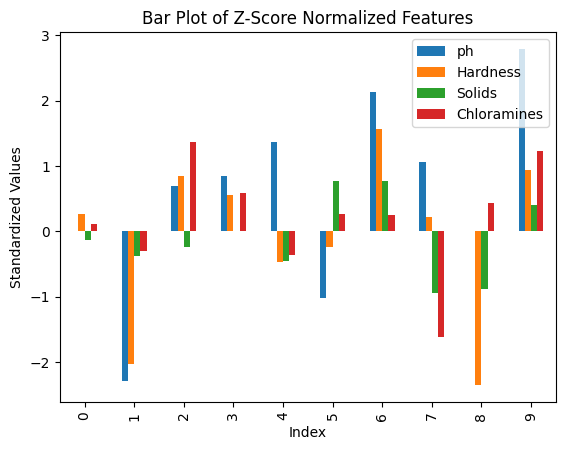

<Figure size 1000x500 with 0 Axes>

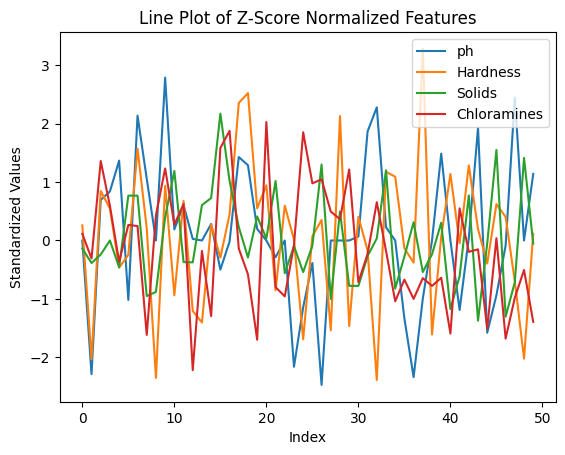

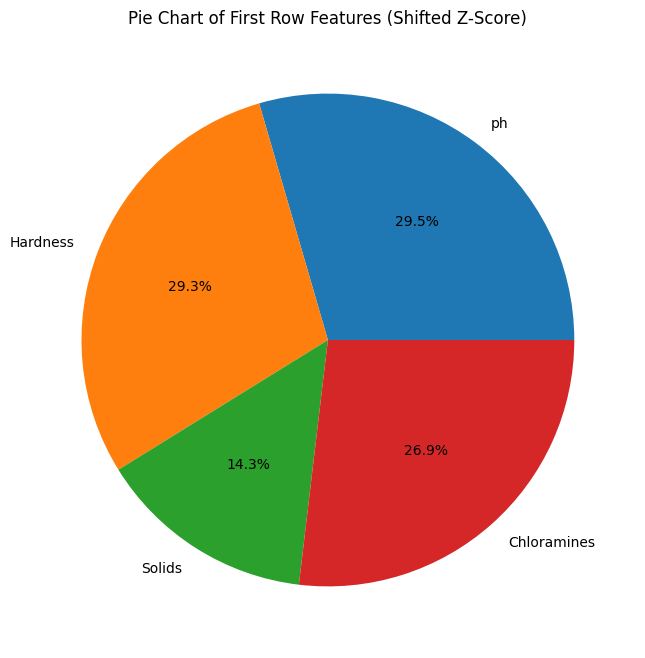

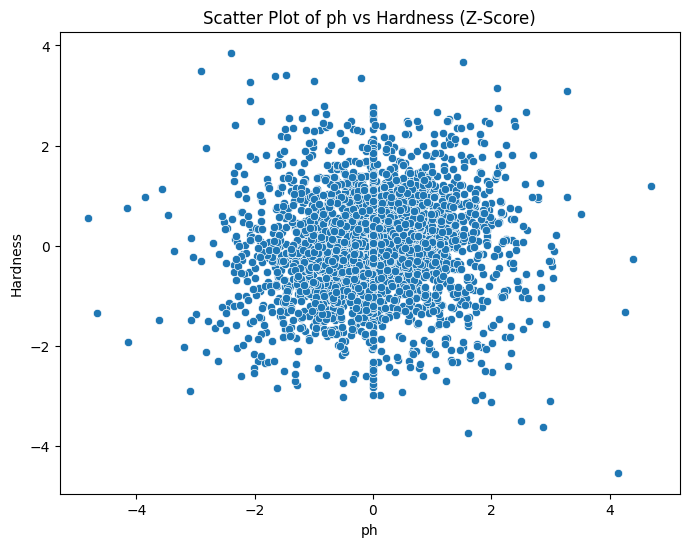

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for better visualization
selected_cols = df_zscore.columns[:4]  # Choose first 4 numerical columns for plotting

# Bar Plot
plt.figure(figsize=(10, 5))
df_zscore[selected_cols].head(10).plot(kind="bar")
plt.title("Bar Plot of Z-Score Normalized Features")
plt.xlabel("Index")
plt.ylabel("Standardized Values")
plt.legend(loc="upper right")
plt.show()

# Line Plot
plt.figure(figsize=(10, 5))
df_zscore[selected_cols].head(50).plot(kind="line")
plt.title("Line Plot of Z-Score Normalized Features")
plt.xlabel("Index")
plt.ylabel("Standardized Values")
plt.legend(loc="upper right")
plt.show()

# ✅ Fix for Pie Chart: Shift values to be positive
df_zscore_shifted = df_zscore[selected_cols] - df_zscore[selected_cols].min()  # Shifting minimum value to 0

# Pie Chart (for the first row with shifted values)
plt.figure(figsize=(8, 8))
df_zscore_shifted.iloc[0].plot(kind="pie", autopct='%1.1f%%')
plt.title("Pie Chart of First Row Features (Shifted Z-Score)")
plt.ylabel("")  # Hide y-label
plt.show()

# Scatter Plot (First two columns for X and Y)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_zscore[selected_cols[0]], y=df_zscore[selected_cols[1]])
plt.title(f"Scatter Plot of {selected_cols[0]} vs {selected_cols[1]} (Z-Score)")
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.show()


<Figure size 1000x500 with 0 Axes>

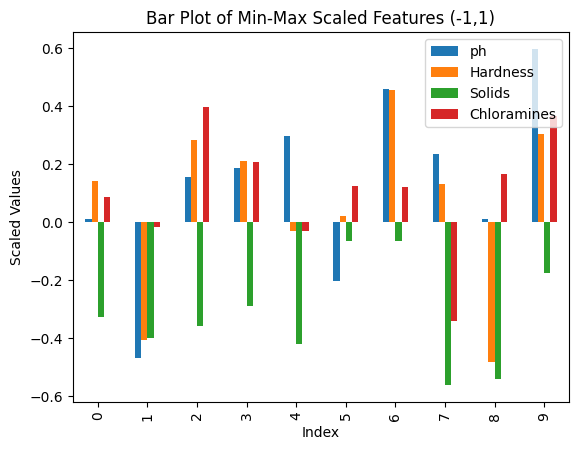

<Figure size 1000x500 with 0 Axes>

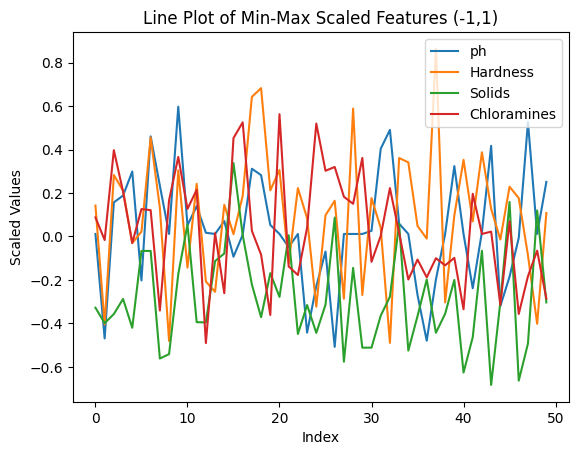

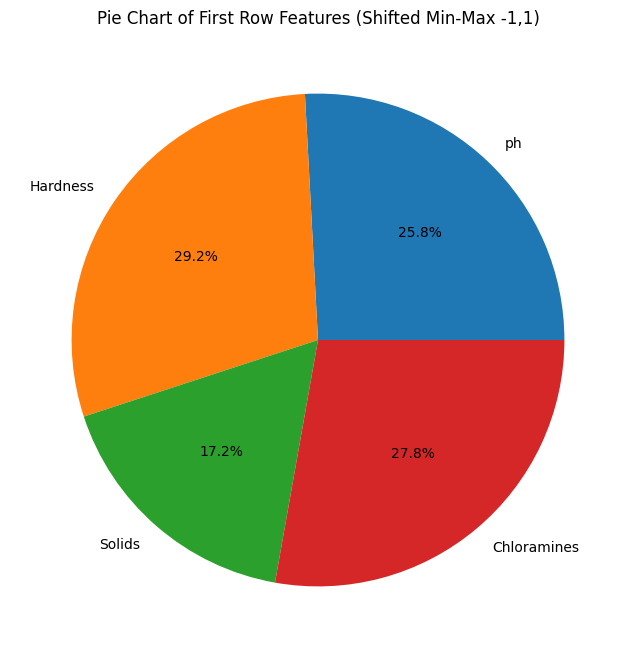

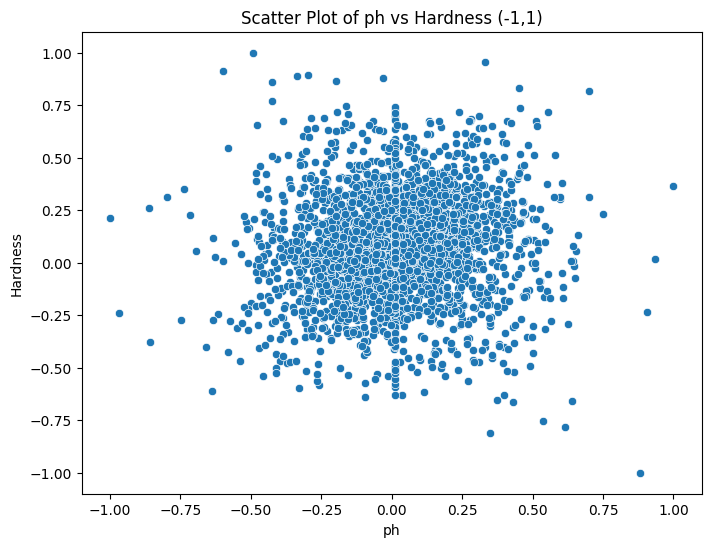

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for better visualization
selected_cols = df_minmax_range.columns[:4]  # Choose first 4 numerical columns for plotting

# Bar Plot
plt.figure(figsize=(10, 5))
df_minmax_range[selected_cols].head(10).plot(kind="bar")
plt.title("Bar Plot of Min-Max Scaled Features (-1,1)")
plt.xlabel("Index")
plt.ylabel("Scaled Values")
plt.legend(loc="upper right")
plt.show()

# Line Plot
plt.figure(figsize=(10, 5))
df_minmax_range[selected_cols].head(50).plot(kind="line")
plt.title("Line Plot of Min-Max Scaled Features (-1,1)")
plt.xlabel("Index")
plt.ylabel("Scaled Values")
plt.legend(loc="upper right")
plt.show()

# ✅ Fix for Pie Chart: Shift values to be positive
df_minmax_range_shifted = df_minmax_range[selected_cols] + 1  # Shifting range from (-1,1) to (0,2)

# Pie Chart (for the first row with shifted values)
plt.figure(figsize=(8, 8))
df_minmax_range_shifted.iloc[0].plot(kind="pie", autopct='%1.1f%%')
plt.title("Pie Chart of First Row Features (Shifted Min-Max -1,1)")
plt.ylabel("")  # Hide y-label
plt.show()

# Scatter Plot (First two columns for X and Y)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_minmax_range[selected_cols[0]], y=df_minmax_range[selected_cols[1]])
plt.title(f"Scatter Plot of {selected_cols[0]} vs {selected_cols[1]} (-1,1)")
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.show()


<Figure size 1000x500 with 0 Axes>

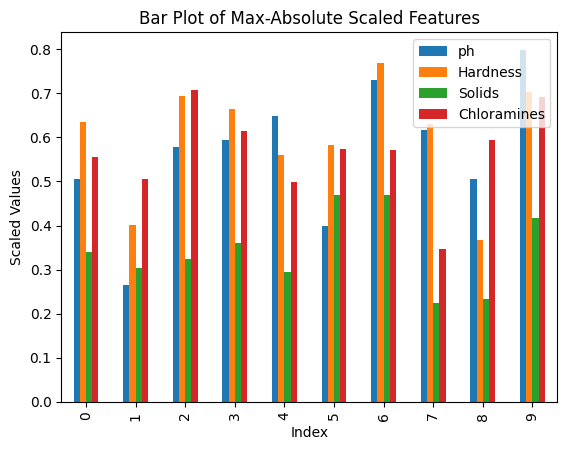

<Figure size 1000x500 with 0 Axes>

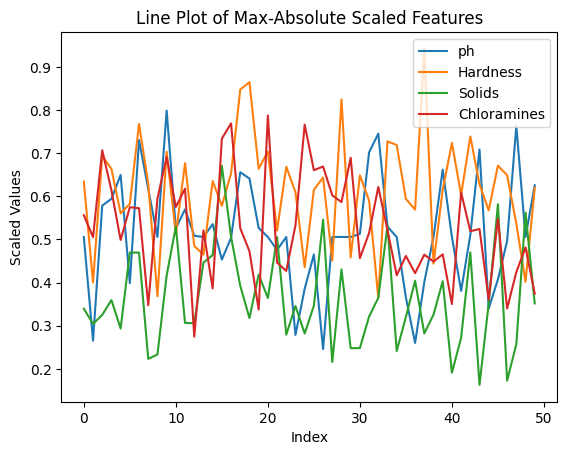

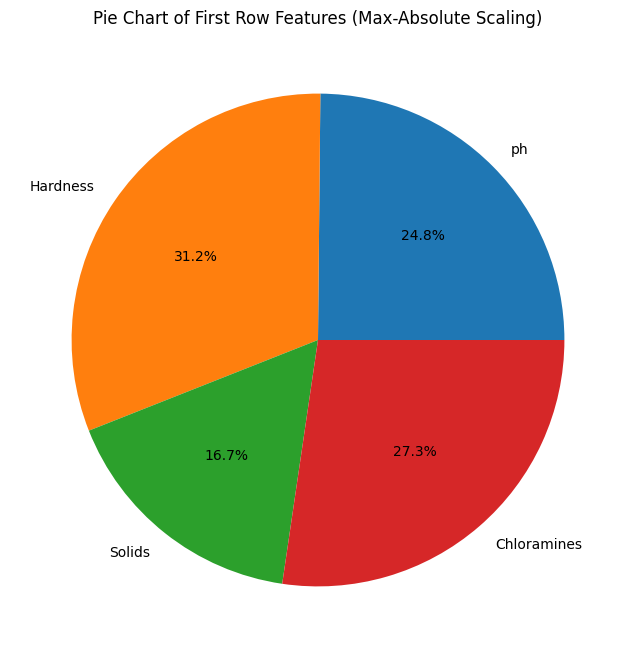

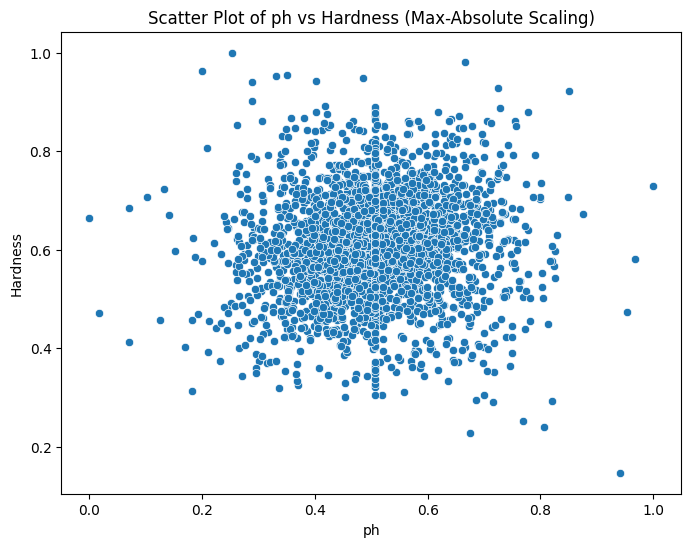

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of columns for better visualization
selected_cols = df_maxabs.columns[:4]  # Choose first 4 numerical columns for plotting

# Bar Plot
plt.figure(figsize=(10, 5))
df_maxabs[selected_cols].head(10).plot(kind="bar")
plt.title("Bar Plot of Max-Absolute Scaled Features")
plt.xlabel("Index")
plt.ylabel("Scaled Values")
plt.legend(loc="upper right")
plt.show()

# Line Plot
plt.figure(figsize=(10, 5))
df_maxabs[selected_cols].head(50).plot(kind="line")
plt.title("Line Plot of Max-Absolute Scaled Features")
plt.xlabel("Index")
plt.ylabel("Scaled Values")
plt.legend(loc="upper right")
plt.show()

# Pie Chart (for the first row)
plt.figure(figsize=(8, 8))
df_maxabs.iloc[0][selected_cols].plot(kind="pie", autopct='%1.1f%%')
plt.title("Pie Chart of First Row Features (Max-Absolute Scaling)")
plt.ylabel("")  # Hide y-label
plt.show()

# Scatter Plot (First two columns for X and Y)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_maxabs[selected_cols[0]], y=df_maxabs[selected_cols[1]])
plt.title(f"Scatter Plot of {selected_cols[0]} vs {selected_cols[1]} (Max-Absolute Scaling)")
plt.xlabel(selected_cols[0])
plt.ylabel(selected_cols[1])
plt.show()


In [ ]:
import pandas as pd

# Load the CSV file (Make sure to upload it in Colab)
file_path = "/content/drive/My Drive/Colab Notebooks/water_potability.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())

# Show summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085 

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset (replace this with your actual dataset)
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/water_potability.csv")  # Ensure your dataset is loaded

# Apply Min-Max Scaling to range (-1,1)
scaler = MinMaxScaler(feature_range=(-1, 1))
df_minmax_range = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now, print min & max values
print("Min values:\n", df_minmax_range.min())
print("Max values:\n", df_minmax_range.max())



Min values:
 ph                -1.0
Hardness          -1.0
Solids            -1.0
Chloramines       -1.0
Sulfate           -1.0
Conductivity      -1.0
Organic_carbon    -1.0
Trihalomethanes   -1.0
Turbidity         -1.0
Potability        -1.0
dtype: float64
Max values:
 ph                 1.0
Hardness           1.0
Solids             1.0
Chloramines        1.0
Sulfate            1.0
Conductivity       1.0
Organic_carbon     1.0
Trihalomethanes    1.0
Turbidity          1.0
Potability         1.0
dtype: float64


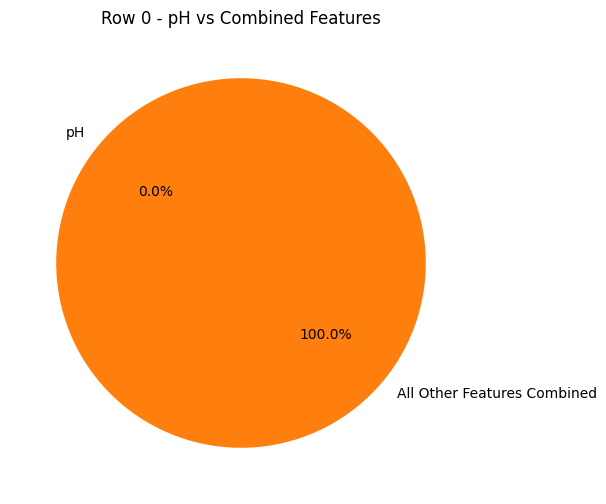

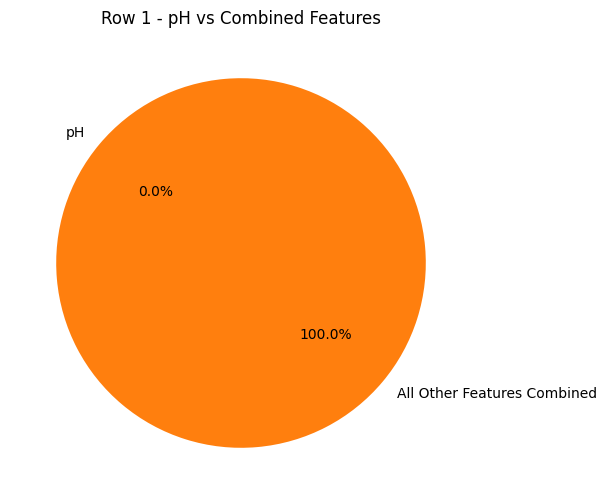

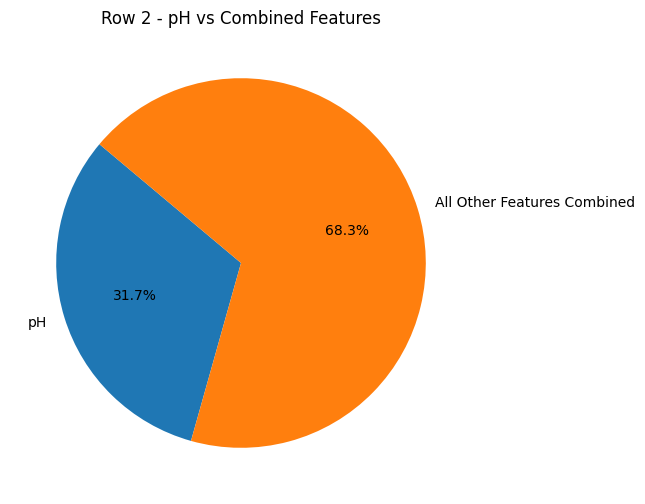

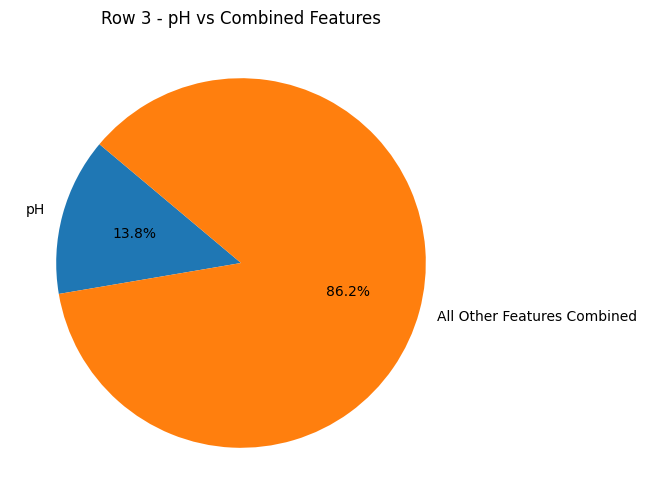

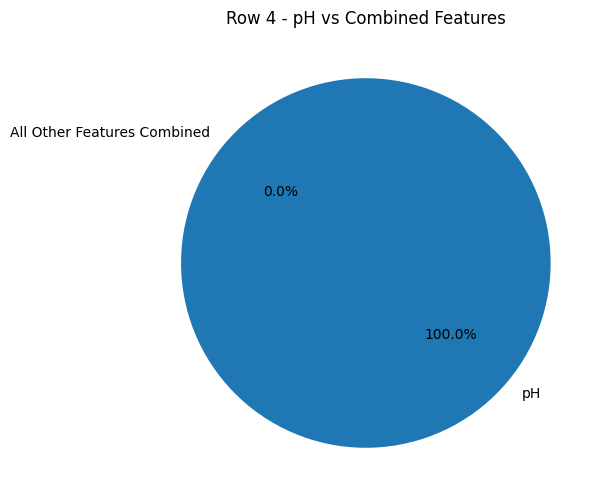

In [ ]:
import matplotlib.pyplot as plt

# Number of rows you want to visualize
num_rows = 5  # You can increase this number

# Loop through the first `num_rows` rows in df_zscore
for i in range(num_rows):
    row = df_zscore.iloc[i]

    # Extract ph and sum of other features
    ph_value = row['ph']
    others_sum = row.drop('ph').sum()

    # Prepare data
    values = [ph_value, others_sum]
    labels = ['pH', 'All Other Features Combined']

    # Shift to positive values for pie chart (if any values are negative)
    min_value = min(values)
    if min_value < 0:
        values = [v - min_value for v in values]

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Row {i} - pH vs Combined Features")
    plt.show()


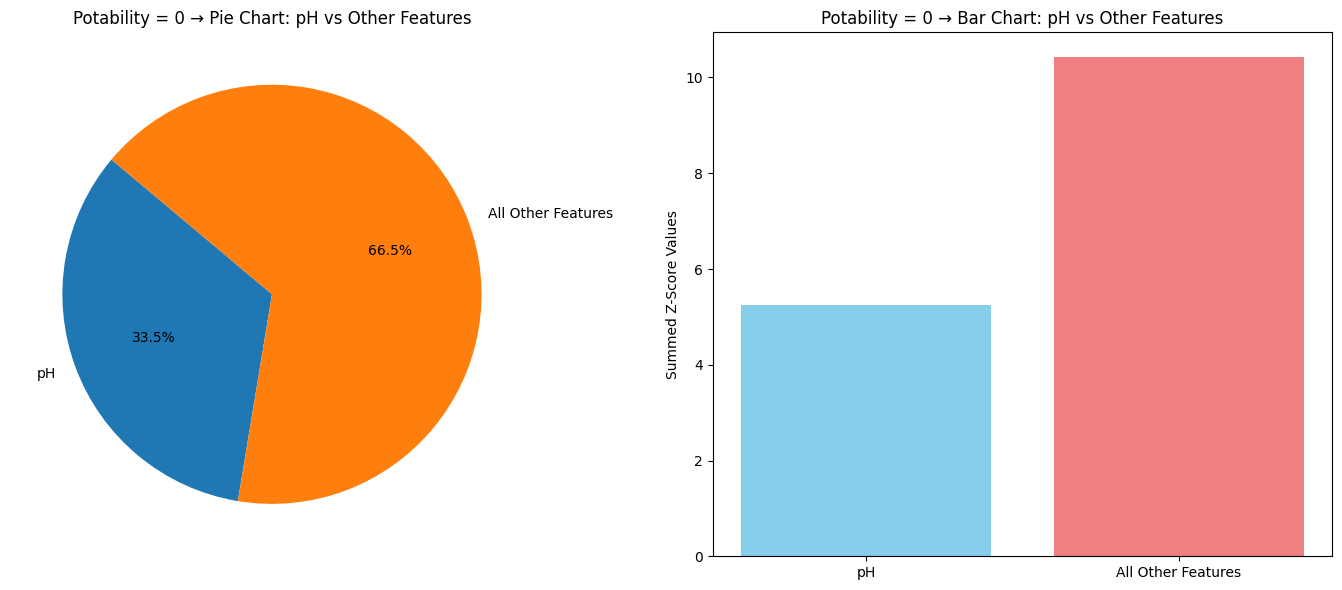

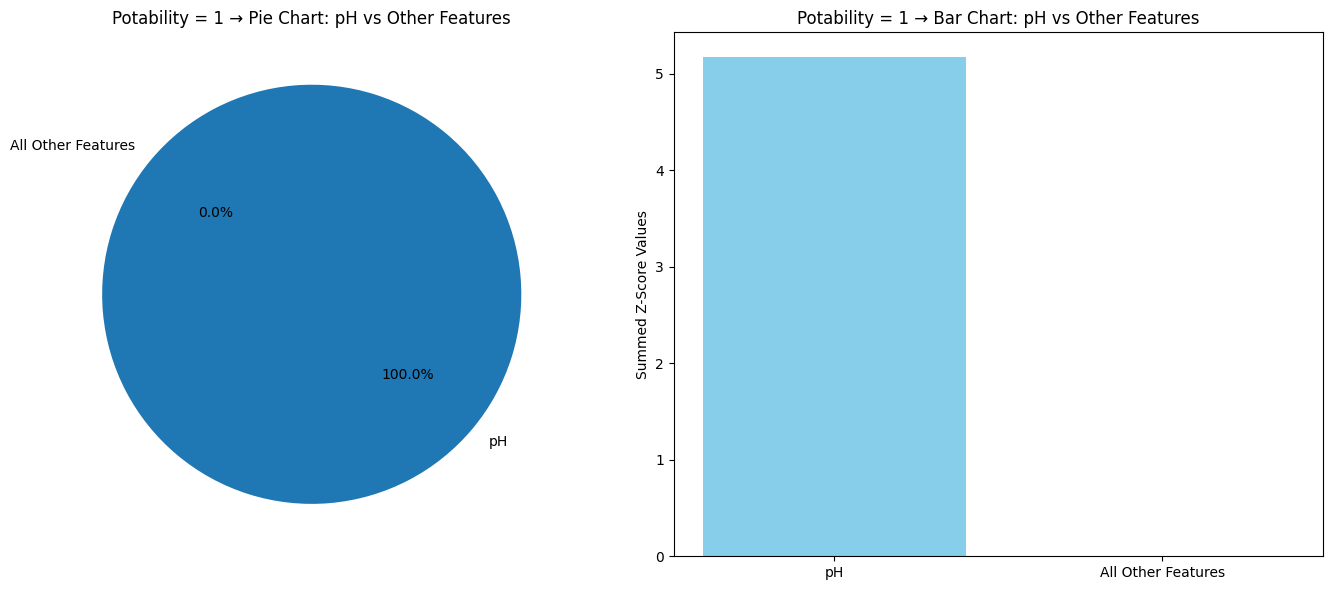

In [ ]:
import matplotlib.pyplot as plt

# Merge 'Potability' back into df_zscore if it's not already there
df_zscore['Potability'] = df['Potability']  # Make sure both DataFrames align row-wise

# Get unique classes
classes = df_zscore['Potability'].unique()

# Loop over each class
for label in classes:
    group = df_zscore[df_zscore['Potability'] == label]

    ph_sum = group['ph'].sum()
    others_sum = group.drop(['ph', 'Potability'], axis=1).sum().sum()

    values = [ph_sum, others_sum]
    labels = ['pH', 'All Other Features']

    # Shift values to be positive for both charts
    min_val = min(values)
    if min_val < 0:
        values = [v - min_val for v in values]

    # --- Pie Chart ---
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Potability = {label} → Pie Chart: pH vs Other Features")

    # --- Bar Chart ---
    plt.subplot(1, 2, 2)
    plt.bar(labels, values, color=['skyblue', 'lightcoral'])
    plt.title(f"Potability = {label} → Bar Chart: pH vs Other Features")
    plt.ylabel("Summed Z-Score Values")

    plt.tight_layout()
    plt.show()
